# LOAN APPROVAL PREDICTION USING MACHINE LEARNING

In [1]:
# importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import svm #algorithm capable of performing classification,regression and outlier detection.
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")

# LOADING AND UNDERSTANDING THE DATASET

In [2]:
# importing the dataset to pandas DataFrame.
Loan_data= pd.read_csv("Loan_disbursment_data.csv")

In [3]:
# Tells the DataFrame object.
type(Loan_data)

pandas.core.frame.DataFrame

In [4]:
# Head() ...understanding the dataset in first 5 rows of data frame
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and column
Loan_data.shape

(614, 13)

In [6]:
# columns in dataset..
Loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#statistical information about the dataframe which contains
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# describing the entire dataset in statistical measures.

Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
Loan_data.nunique() # number  of  distinct observations

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
# To check unique values for a particular column
Loan_data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [11]:
Loan_data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

# DATA PRE-PROCESSING

In [12]:
# checking the existence of NULL VALUES in each column by using boolean type

Loan_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [13]:
# finding the missing values in each column

Loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# dropping the missing values

Loan_data = Loan_data.dropna()

In [15]:
# finding the missing values in each column

Loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# dependent column values
Loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [17]:
# replacing the values of 3+ to 4
Loan_data = Loan_data.replace(to_replace = '3+',value = 4)

In [18]:
# dependent column values
Loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='Gender', ylabel='count'>

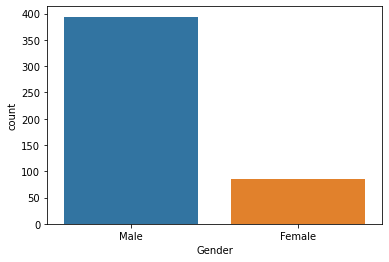

In [19]:
#countplot() method is used to show the counts of observations in each categorical bin using bars.

sns.countplot(Loan_data["Gender"]) 

<AxesSubplot:xlabel='Married', ylabel='count'>

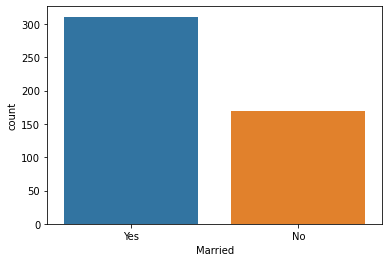

In [20]:
sns.countplot(Loan_data["Married"]) 

<AxesSubplot:>

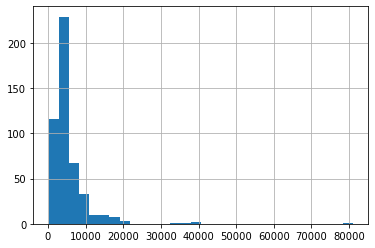

In [21]:
#hist(): used to plot a histogram

Loan_data["ApplicantIncome"].hist(bins=30)

<AxesSubplot:xlabel='Education', ylabel='count'>

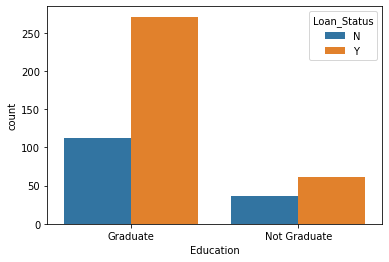

In [22]:
# education and loan status using sns.countplot.
# hue: The parameter take column name for colour encoding.

sns.countplot(x='Education',hue = 'Loan_Status',data = Loan_data) 

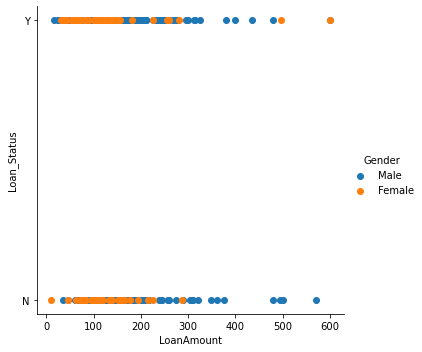

In [23]:
# using SCATTER REPRESENTATION
# Imported libraries---> x-axis : LoanAmount, y- axis : Loan_Status and representing interms of Gender

sns.FacetGrid(Loan_data,hue = "Gender",height = 5) \
.map(plt.scatter,"LoanAmount","Loan_Status") \
.add_legend()
plt.show()

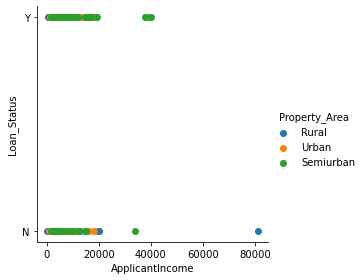

In [24]:
# x-axis : ApplicantIncome , y- axis : CoapplicantIncome and representing interms of Property_Area

sns.FacetGrid(Loan_data,hue = "Property_Area",size = 4) \
.map(plt.scatter,"ApplicantIncome","Loan_Status") \
.add_legend()
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

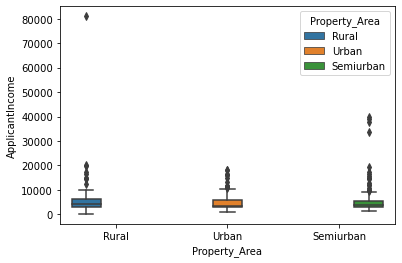

In [25]:
sns.boxplot(x = "Property_Area", y = "ApplicantIncome",hue = 'Property_Area',data = Loan_data)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

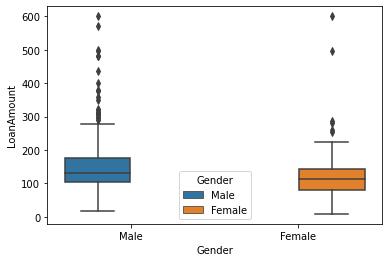

In [26]:
sns.boxplot(x = "Gender", y = "LoanAmount",hue = "Gender",data = Loan_data)

# LABEL ENCODING

In [27]:
# label encoding:- It Replace all Categorical value into numerical value.

Loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)

In [28]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [29]:
#Machine learning model require all input and output variables to be numeric.
Loan_data.replace({'Loan_Status':{'N':0,'Y':1},
                   'Married':{'No':0,'Yes':1},
                   'Gender':{'Male':1,'Female':0},
                   'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                   'Education':{'Graduate':1,'Not Graduate':0}},inplace = True)

In [30]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<AxesSubplot:>

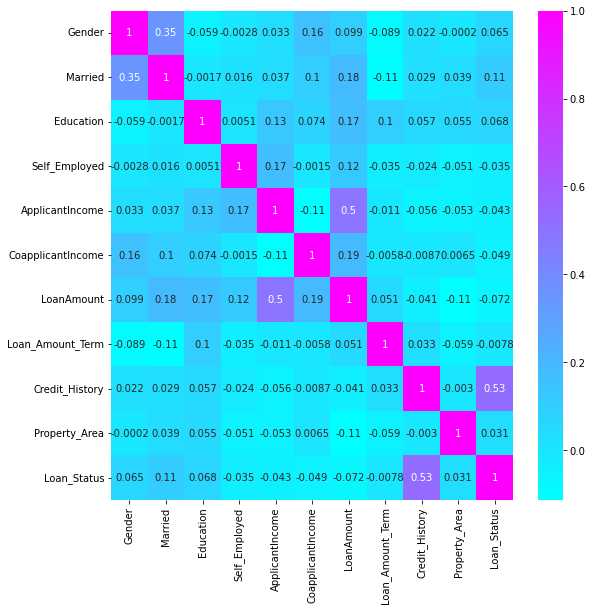

In [31]:
corr=Loan_data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True,cmap='cool')

# SPLITTING TRAIN AND TEST DATA

In [32]:
# seperating the data and label
X = Loan_data.drop(columns=['Loan_ID','Loan_Status'],axis = 1)
Y = Loan_data['Loan_Status']

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


# TRAINING THE MODEL

In [35]:
#support vector machine model
classifier = svm.SVC(kernel = 'linear')

In [36]:
# training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# MODEL EVALUATION

In [37]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [38]:
print("Accuracy on training data = ",training_data_accuracy)

Accuracy on training data =  0.7786458333333334


In [39]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [40]:
print("Accuracy on test data = ",test_data_accuracy)

Accuracy on test data =  0.8125


# LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
ypred = logreg.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, accuracy_score
ac = accuracy_score(Y_test, ypred)
cr = classification_report(Y_test,ypred)

In [43]:
print(f"Accuracy : {ac}")
print(f"\n\n{cr}")

Accuracy : 0.8333333333333334


              precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96



Precision : TP/TP+FP (High Precision rate relates to the low false +ve rate) recall(Sensitivity) : TP/TP+FN (recall > 0.5 is good for model) F1 Score: is hormonic mean of precision and recall and is better measure than accuracy.

# MAKING A PREDICTIVE SYSTEM

In [44]:
# StandardScaler removes the mean(0) and scales the data to the unit variance(1)
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(X)

StandardScaler()

In [47]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
  -0.02954695]]


In [48]:
#Using SVM Classifier
#Gen,Mar,Dep,Edu,Self_Emp,ApplicantInco,CoapplicantInco,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area

input_data = (0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0)


# changing the input_data to numpy arrary
a= np.asarray(input_data)
                                    
# reshape the array as we are predicting for one instance    
input_data_reshaped = a.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print("The PERSON IS 'NOT ELIGIBLE' FOR LOAN.")
else:
    print("The PERSON IS 'ELIGIBLE' FOR LOAN.")

[[-2.14041943 -1.35655324 -0.70475462  0.50325312 -0.3992747  -0.43519634
  -0.604633   -0.91683055  0.27554157  0.41319694 -1.31886834]]
[0]
The PERSON IS 'NOT ELIGIBLE' FOR LOAN.


In [49]:
#Using SVM Classifier
#Gen,Mar,Dep,Edu,Self_Emp,ApplicantInco,CoapplicantInco,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
input_data = (1,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2)

# changing the input_data to numpy arrary
a= np.asarray(input_data)
                                    
# reshape the array as we are predicting for one instance    
input_data_reshaped = a.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print("The PERSON IS 'NOT ELIGIBLE' FOR LOAN.")
else:
    print("The PERSON IS 'ELIGIBLE' FOR LOAN.")

[[ 0.46719815  0.73716237  0.11235219 -1.98707162 -0.3992747  -0.49118022
   0.29710022 -0.30756164  0.27554157  0.41319694  1.25977445]]
[1]
The PERSON IS 'ELIGIBLE' FOR LOAN.


In [50]:
#Using Logistic Regression
#Gen,Mar,Dep,Edu,Self_Emp,ApplicantInco,CoapplicantInco,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
input_data = (1,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2)


# changing the input_data to numpy arrary
a= np.asarray(input_data)
                                    
# reshape the array as we are predicting for one instance    
input_data_reshaped = a.reshape(1,-1)# 1 row 11 columns


# standardize the input data

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = logreg.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print("The PERSON IS 'NOT ELIGIBLE' FOR LOAN.")
else:
    print("The PERSON IS 'ELIGIBLE' FOR LOAN.")

[[ 0.46719815  0.73716237  0.11235219 -1.98707162 -0.3992747  -0.49118022
   0.29710022 -0.30756164  0.27554157  0.41319694  1.25977445]]
[1]
The PERSON IS 'ELIGIBLE' FOR LOAN.
